In [1]:
import numpy as np

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [12]:
# Complex math
import cmath

def eval_complex_function(f, X, Y):
    """
    f: cmath.complex --> cmath.complex
    X,Y: 1d arrays of coordinates to evalute the function at
    X is real axis, Y is imaginary axis.
    
    Returns a 2d array:
    N = len(x)
    M = len(y)
    [ f(x[0] + i*y[0]), ..., f(x[0] + i*y[M-1])
      ...               ...                 ...
      f(x[N-1] + i*y[0]), ..., f(x[N-1] + i*y[M-1])
    """
    res = []
    for i in range(len(X)):
        res.append([])
        for j in range(len(Y)):
            res[i].append(f(X[i] + 1j * Y[j]))
    return np.array(res)

In [13]:
class ComplexPlotter:
    def __init__(self):
        self.fig = plt.figure()
        self.ax = self.fig.gca(projection='3d')
    
    def plot_complex_function(self, f, X):
        """
        f: cmath.Complex --> cmath.Complex
        X: 1d array of input values. Evaluate function on X*X grid in complex plane.
        """
        # Evaluation on X*X grid
        Z = eval_complex_function(f, X, X)
        
        # Define X, Y mesh for plotting
        X, Y = np.meshgrid(X, X)
        
        # Convert Z into 2 2d arrays: magnitude and phase
        Z_magnitude = np.zeros(Z.shape)
        Z_phase = np.zeros(Z.shape)
        for i in range(Z.shape[0]):
            for j in range(Z.shape[1]):
                z_polar = cmath.polar(Z[i][j])
                Z_magnitude[i][j] = z_polar[0]
                Z_phase[i][j] = z_polar[1]
                
        # Renormalize phase to define colormap
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html
        Z_phase = Z_phase + cmath.pi # [-pi, pi] --> [0, 2pi]
        Z_phase = Z_phase / (cmath.pi*2) # [0, 2pi] --> [0, 1]
        cmap = cm.hsv(Z_phase)
        # Plots 3d surface
        surf = self.ax.plot_surface(X, Y, Z_magnitude, facecolors=cmap,
                           linewidth=0, antialiased=False)
    
    def plot_contour(self, f, T, height=1, color='blue'):
        """
        Plot 2d contour parameterized by complex valued function f(t).
        T is 1d input array. height is z axis value for all points
        """
        # Compute 2d coordinates of contour
        X, Y = [], [] # Real and imaginary components of {f(t): t in T}
        for t in T:
            z = f(t)
            X.append(z.real)
            Y.append(z.imag)
        
        # Plot 2d contour at height
        self.ax.plot(X, Y, height, color=color)

<IPython.core.display.Javascript object>


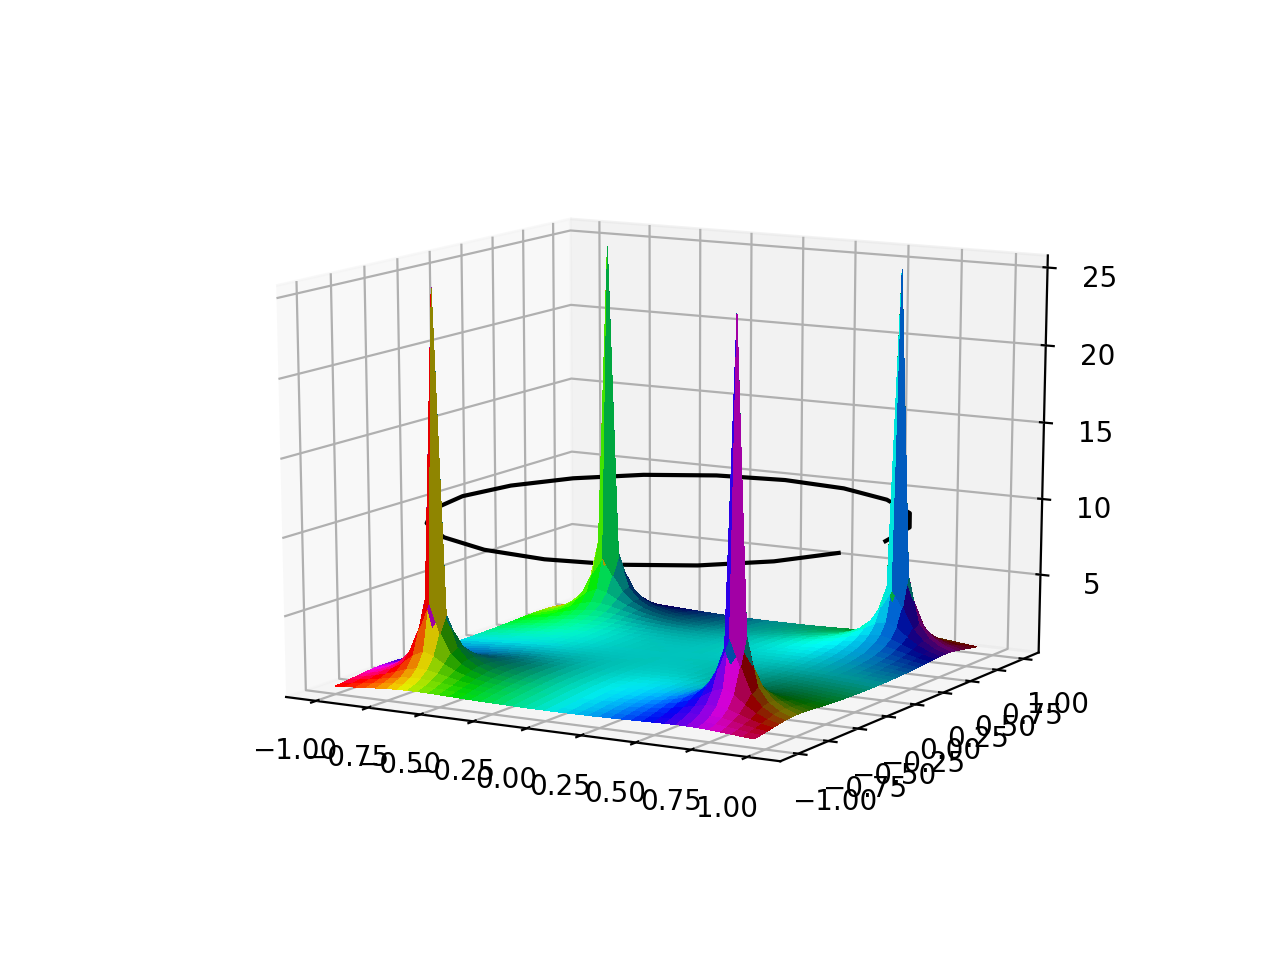

In [14]:
# --------------------
# MAIN USER INTERFACE
# --------------------

# Input params for plotting
FRAME_SIZE = 1 # Frame is square centered at zero with 2*FRAME_SIZE length
RESOLUTION = 20 # Evaluation bins per FRAME_SIZE

plotter = ComplexPlotter()

# Function plotting
def f(z):
    return 1 / (z**4 + 1)
X = np.arange(-FRAME_SIZE, FRAME_SIZE, FRAME_SIZE/RESOLUTION)
plotter.plot_complex_function(f, X)

# Contour plotting
def unit_circle(t):
    return cmath.exp(1j*t)
T = np.arange(0, 2*cmath.pi, 2*cmath.pi/RESOLUTION)
plotter.plot_contour(unit_circle, T, height=10, color='black')

plt.show()